# cars

In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd

# Wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import numpy as np


In [3]:
test = pd.read_csv('test.csv')

In [4]:
d = pd.read_csv("train.csv")

In [5]:
d.shape

(188533, 13)

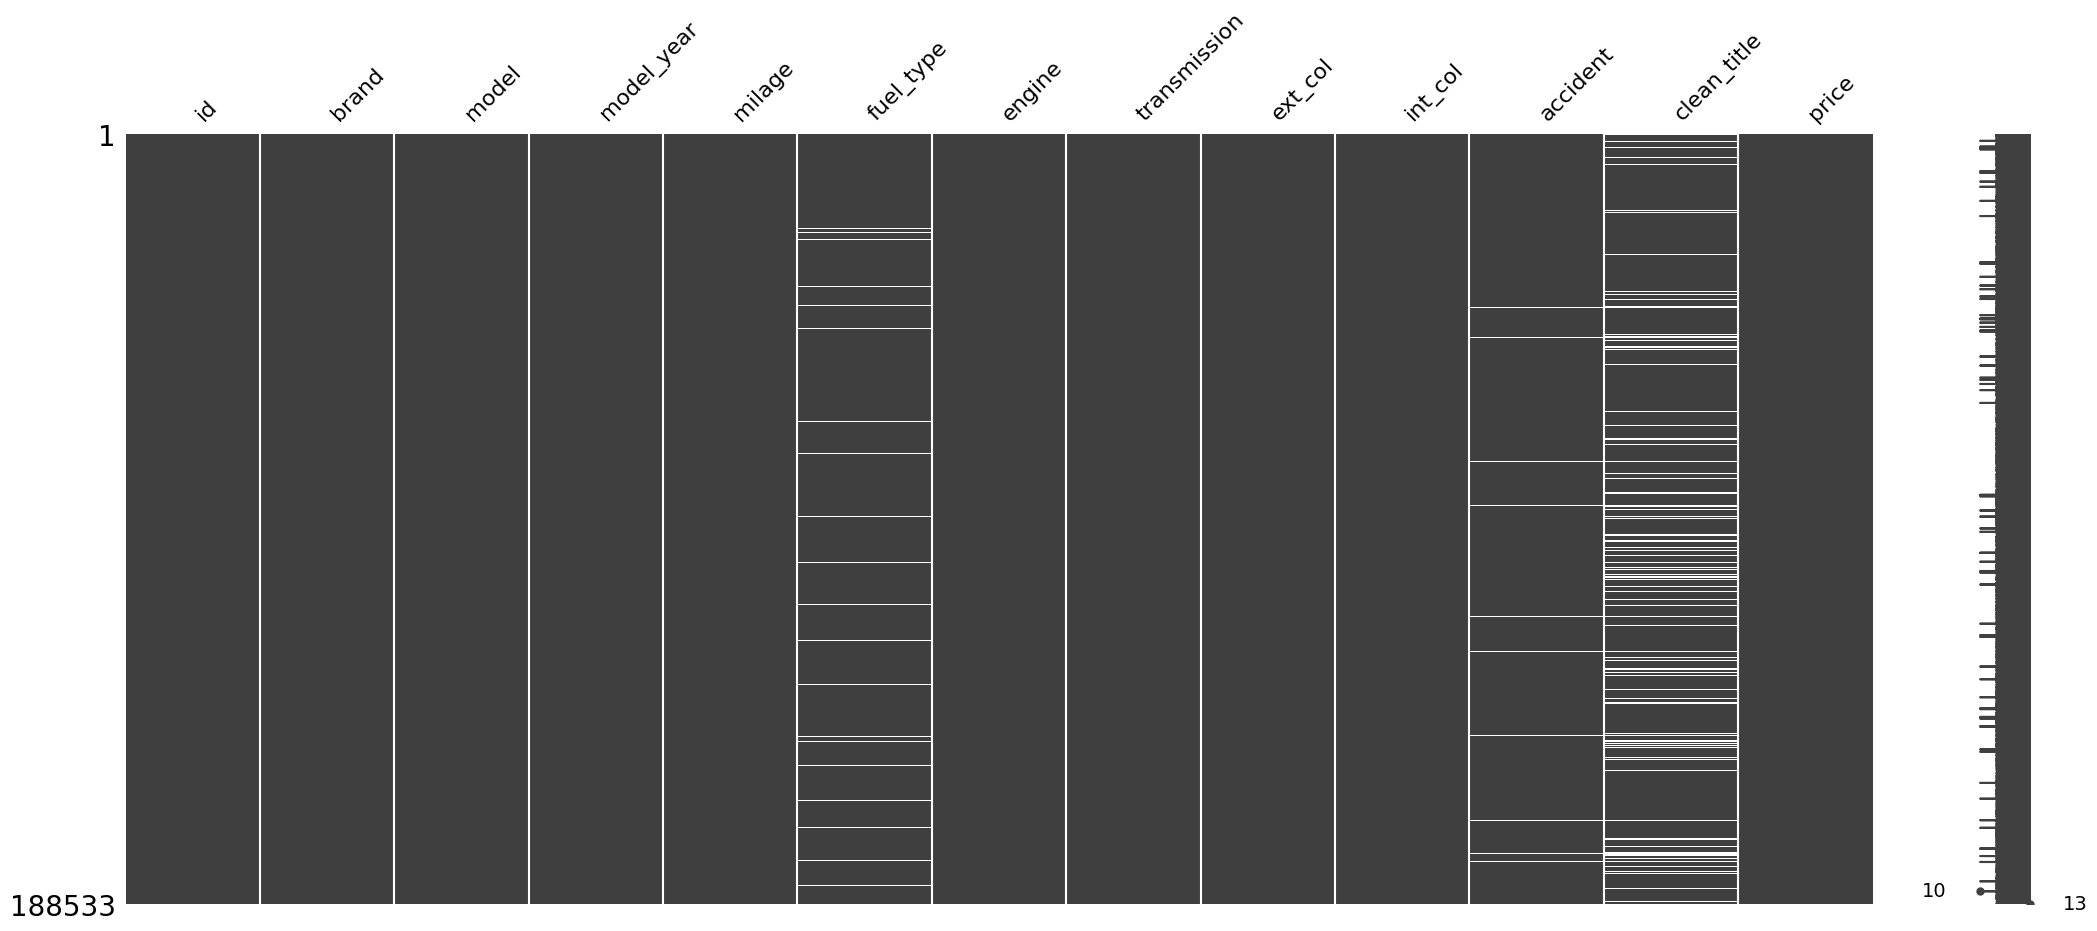

In [6]:
# missing data
msno.matrix(d)
plt.show()

In [7]:
d['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

### BRAND: groups

#### [1] country of origin

In [8]:
country_origin = {
    'USA': ['Lincoln', 'Chevrolet', 'Cadillac', 'GMC', 'Ford', 'Tesla', 'Buick', 'Dodge', 'RAM', 'Hummer', 'Jeep', 
            'Chrysler', 'Pontiac', 'Saturn', 'Mercury', 'Lucid', 'Rivian', 'Karma'],
    'Germany': ['Mercedes-Benz', 'Audi', 'BMW', 'Volkswagen', 'Porsche', 'smart', 'Maybach'],
    'Japan': ['Toyota', 'Honda', 'Lexus', 'Nissan', 'Mitsubishi', 'Subaru', 'Mazda', 'INFINITI'],
    'UK': ['MINI', 'Bentley', 'Rolls-Royce', 'Aston Martin', 'McLaren', 'Lotus', 'Land Rover'],
    'Italy': ['Alfa Romeo', 'FIAT', 'Maserati', 'Ferrari', 'Lamborghini', 'Bugatti'],
    'South Korea': ['Hyundai', 'Kia', 'Genesis'],
    'Sweden': ['Volvo', 'Polestar', 'Saab']
}

#### [2] market segment

In [9]:
market_segment = {
    'Luxury and Premium': ['Mercedes-Benz', 'BMW', 'Lexus', 'Audi', 'Cadillac', 'Lincoln', 'Genesis', 'Rolls-Royce', 
                           'Bentley', 'Maserati', 'Aston Martin', 'Ferrari', 'Lamborghini', 'Bugatti'],
    'Standard and Economic': ['Toyota', 'Honda', 'Hyundai', 'Ford', 'Kia', 'Nissan', 'Volkswagen', 'Chevrolet', 
                              'Mazda', 'Subaru'],
    'Sports and Supercars': ['Ferrari', 'Lamborghini', 'Porsche', 'McLaren', 'Bugatti', 'Aston Martin'],
    'Electric': ['Tesla', 'Rivian', 'Lucid', 'Polestar', 'Karma'],
    'SUV and Off-road': ['Jeep', 'Land Rover', 'Hummer', 'RAM', 'GMC', 'Ford', 'Toyota']
}


#### [3] Fuel type

In [10]:
fuel_type = {
    'Electric': ['Tesla', 'Rivian', 'Lucid', 'Polestar', 'Karma'],
    'Hybrid/Electric': ['Toyota', 'Honda', 'Ford'],
    'Gasoline/Diesel': ['Lincoln', 'Chevrolet', 'Cadillac', 'GMC', 'Ford', 'Buick', 'Dodge', 'RAM', 'Hummer', 
                        'Jeep', 'Chrysler', 'Pontiac', 'Saturn', 'Mercury', 'Mercedes-Benz', 'Audi', 'BMW', 
                        'Volkswagen', 'Porsche', 'MINI', 'Bentley', 'Rolls-Royce', 'Aston Martin', 'McLaren', 
                        'Lotus', 'Alfa Romeo', 'FIAT', 'Maserati', 'Ferrari', 'Lamborghini', 'Bugatti', 'Hyundai', 
                        'Kia', 'Nissan', 'Mazda', 'Subaru', 'INFINITI']
}


#### [4] corporate group

In [11]:
corporate_group = {
    'Volkswagen Group': ['Volkswagen', 'Audi', 'Porsche', 'Lamborghini', 'Bentley'],
    'BMW Group': ['BMW', 'MINI', 'Rolls-Royce'],
    'Stellantis': ['Chrysler', 'Dodge', 'Jeep', 'FIAT', 'Alfa Romeo'],
    'Toyota Group': ['Toyota', 'Lexus'],
    'Ford Motor Company': ['Ford', 'Lincoln'],
    'General Motors': ['Chevrolet', 'GMC', 'Cadillac', 'Buick'],
}

#### [5] p

In [12]:
premium_brands = {
    'MINI': False, 'Lincoln': True, 'Chevrolet': False, 'Genesis': True, 'Mercedes-Benz': True, 'Audi': True,
    'Ford': False, 'BMW': True, 'Tesla': True, 'Cadillac': True, 'Land': False, 'GMC': False, 'Toyota': False,
    'Hyundai': False, 'Volvo': True, 'Volkswagen': False, 'Buick': False, 'Rivian': True, 'RAM': False,
    'Hummer': False, 'Alfa': True, 'INFINITI': True, 'Jeep': False, 'Porsche': True, 'McLaren': True,
    'Honda': False, 'Lexus': True, 'Dodge': False, 'Nissan': False, 'Jaguar': True, 'Acura': True, 'Kia': False,
    'Mitsubishi': False, 'Rolls-Royce': True, 'Maserati': True, 'Pontiac': False, 'Saturn': False,
    'Bentley': True, 'Mazda': False, 'Subaru': False, 'Ferrari': True, 'Aston': True, 'Lamborghini': True,
    'Chrysler': False, 'Lucid': True, 'Lotus': True, 'Scion': False, 'smart': False, 'Karma': True,
    'Plymouth': False, 'Suzuki': False, 'FIAT': False, 'Saab': False, 'Bugatti': True, 'Mercury': False,
    'Polestar': True, 'Maybach': True
}

In [13]:
foo = d[['price', 'brand']].copy()

In [14]:
foo

,price,brand
0,4200,MINI
1,4999,Lincoln
2,13900,Chevrolet
3,45000,Genesis
4,97500,Mercedes-Benz
...,...,...
188528,27500,Cadillac
188529,30000,Mercedes-Benz
188530,86900,Mercedes-Benz
188531,84900,Audi


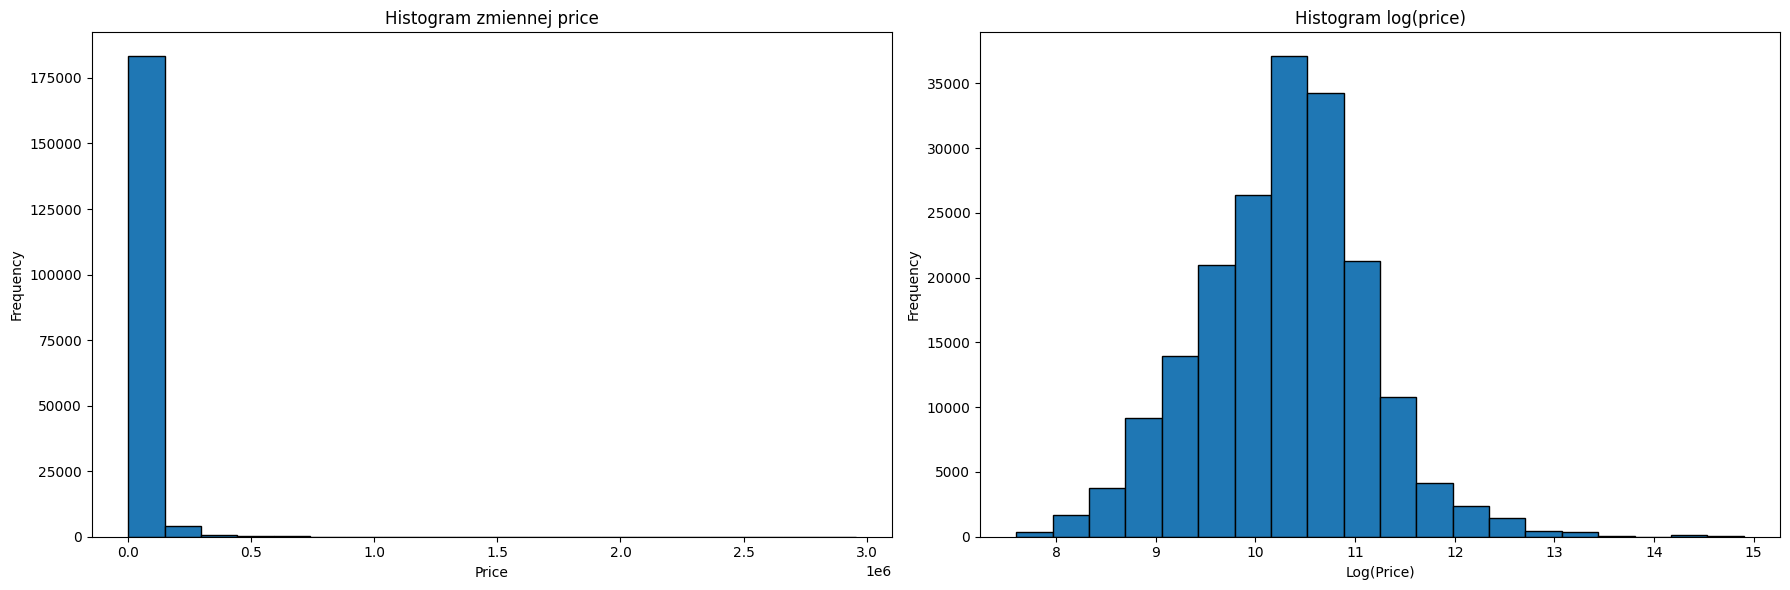

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Tworzymy przekształcenia zmiennej 'price'
price_log = np.log(foo['price'][foo['price'] > 0])  # Logarytm tylko dla wartości > 0

# Ustawienie wielkości figury i trzech podwykresów
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram dla zmiennej 'price'
axes[0].hist(foo['price'], bins=20, edgecolor='black')
axes[0].set_title('Histogram zmiennej price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Histogram dla logarytmu zmiennej 'price'
axes[1].hist(price_log, bins=20, edgecolor='black')
axes[1].set_title('Histogram log(price)')
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Frequency')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()


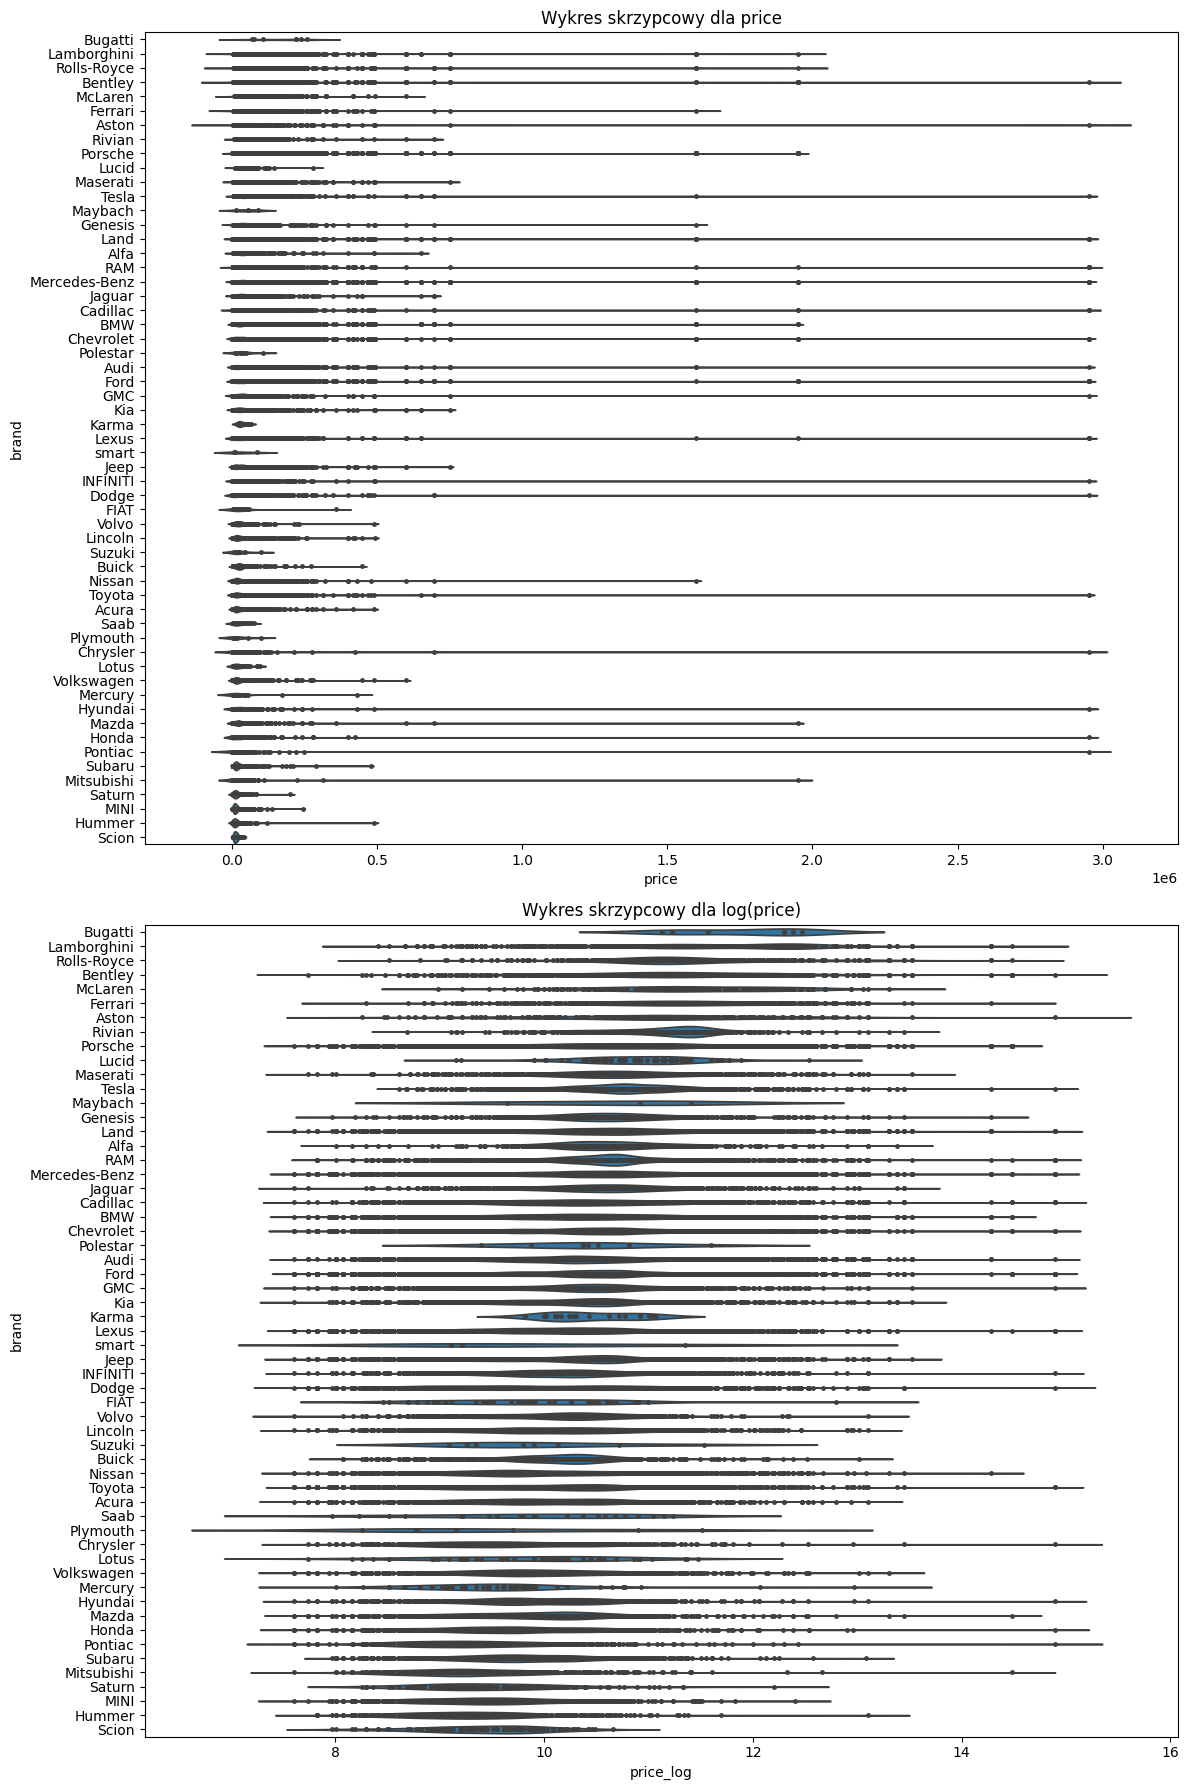

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzymy nową kolumnę 'price_log' tylko dla cen większych od zera, ponieważ log(0) jest nieokreślony
foo['price_log'] = np.log(foo['price'][foo['price'] > 0])

# Obliczamy średnią cenę dla każdej marki i sortujemy marki od najwyższej do najniższej średniej
brand_order = foo.groupby('brand')['price'].mean().sort_values(ascending=False).index

# Ustawienie figury z dwoma podwykresami w układzie pionowym
fig, axes = plt.subplots(2, 1, figsize=(12, 18))

# Wykres skrzypcowy dla zmiennej 'price' w układzie poziomym
sns.violinplot(data=foo, y='brand', x='price', order=brand_order, inner='point', ax=axes[0])
axes[0].set_title('Wykres skrzypcowy dla price')

# Wykres skrzypcowy dla logarytmu zmiennej 'price' w układzie poziomym
sns.violinplot(data=foo[foo['price'] > 0], y='brand', x='price_log', order=brand_order, inner='point', ax=axes[1])
axes[1].set_title('Wykres skrzypcowy dla log(price)')

# Dopasowanie układu
plt.tight_layout()
plt.show()


In [17]:
# Tworzenie zflattenowanych słowników z markami jako kluczami
flat_country_origin = {brand: country for country, brands in country_origin.items() for brand in brands}
flat_market_segment = {brand: segment for segment, brands in market_segment.items() for brand in brands}
flat_fuel_type = {brand: fuel for fuel, brands in fuel_type.items() for brand in brands}
flat_corporate_group = {brand: group for group, brands in corporate_group.items() for brand in brands}

# Zastosowanie mapowania do kolumn w foo
foo['country'] = foo['brand'].map(flat_country_origin).fillna('Unknown')
foo['market_segment'] = foo['brand'].map(flat_market_segment).fillna('Unknown')
foo['fuel'] = foo['brand'].map(flat_fuel_type).fillna('Unknown')
foo['corporate_group'] = foo['brand'].map(flat_corporate_group).fillna('Independent')
foo['premium'] = foo['brand'].map(premium_brands)

In [18]:
foo

,price,brand,price_log,country,market_segment,fuel,corporate_group,premium
0,4200,MINI,8.342840,UK,Unknown,Gasoline/Diesel,BMW Group,False
1,4999,Lincoln,8.516993,USA,Luxury and Premium,Gasoline/Diesel,Ford Motor Company,True
2,13900,Chevrolet,9.539644,USA,Standard and Economic,Gasoline/Diesel,General Motors,False
3,45000,Genesis,10.714418,South Korea,Luxury and Premium,Unknown,Independent,True
4,97500,Mercedes-Benz,11.487608,Germany,Luxury and Premium,Gasoline/Diesel,Independent,True
...,...,...,...,...,...,...,...,...
188528,27500,Cadillac,10.221941,USA,Luxury and Premium,Gasoline/Diesel,General Motors,True
188529,30000,Mercedes-Benz,10.308953,Germany,Luxury and Premium,Gasoline/Diesel,Independent,True
188530,86900,Mercedes-Benz,11.372513,Germany,Luxury and Premium,Gasoline/Diesel,Independent,True
188531,84900,Audi,11.349229,Germany,Luxury and Premium,Gasoline/Diesel,Volkswagen Group,True


In [19]:
import numpy as np
import pandas as pd

# Tworzenie kopii danych, aby uniknąć modyfikacji oryginalnych danych
encoded_data = foo.copy()

# Lista zmiennych kategorycznych do zakodowania
categorical_cols = ['brand', 'country', 'market_segment', 'fuel', 'corporate_group', 'premium']

# Obliczenie globalnej mediany ceny 'price'
global_median = encoded_data['price'].median()

# Parametr wygładzania
k = 5

# Zakodowanie każdej zmiennej kategorycznej z wygładzaniem
for col in categorical_cols:
    # Grupa danych według kategorii
    category_data = encoded_data.groupby(col)['price']
    
    # Obliczenie mediany i liczby obserwacji dla każdej kategorii
    median = category_data.median()
    count = category_data.count()
    
    # Obliczenie wygładzonej wartości
    smoothing = 1 / (1 + np.exp(-(count - k)))
    encoded_value = global_median * (1 - smoothing) + median * smoothing
    
    # Przypisanie wygładzonych wartości do nowych kolumn
    encoded_data[f'{col}_target_encoded'] = encoded_data[col].map(encoded_value)
    
# Zachowanie tylko kolumn przekodowanych oraz 'price' i 'price_log'
columns_to_keep = ['price'] + [f'{col}_target_encoded' for col in categorical_cols]
encoded_data = encoded_data[columns_to_keep]

# Sprawdzenie wyników
encoded_data.head()


,price,brand_target_encoded,country_target_encoded,market_segment_target_encoded,fuel_target_encoded,corporate_group_target_encoded,premium_target_encoded
0,4200,12992.5,45855.0,28900.0,31000.0,30500.0,28495.0
1,4999,23500.0,32000.0,32000.0,31000.0,31000.0,34000.0
2,13900,32000.0,32000.0,24998.0,31000.0,31750.0,28495.0
3,45000,39999.0,27800.0,32000.0,30919.0,31900.0,34000.0
4,97500,36570.0,34000.0,32000.0,31000.0,31900.0,34000.0


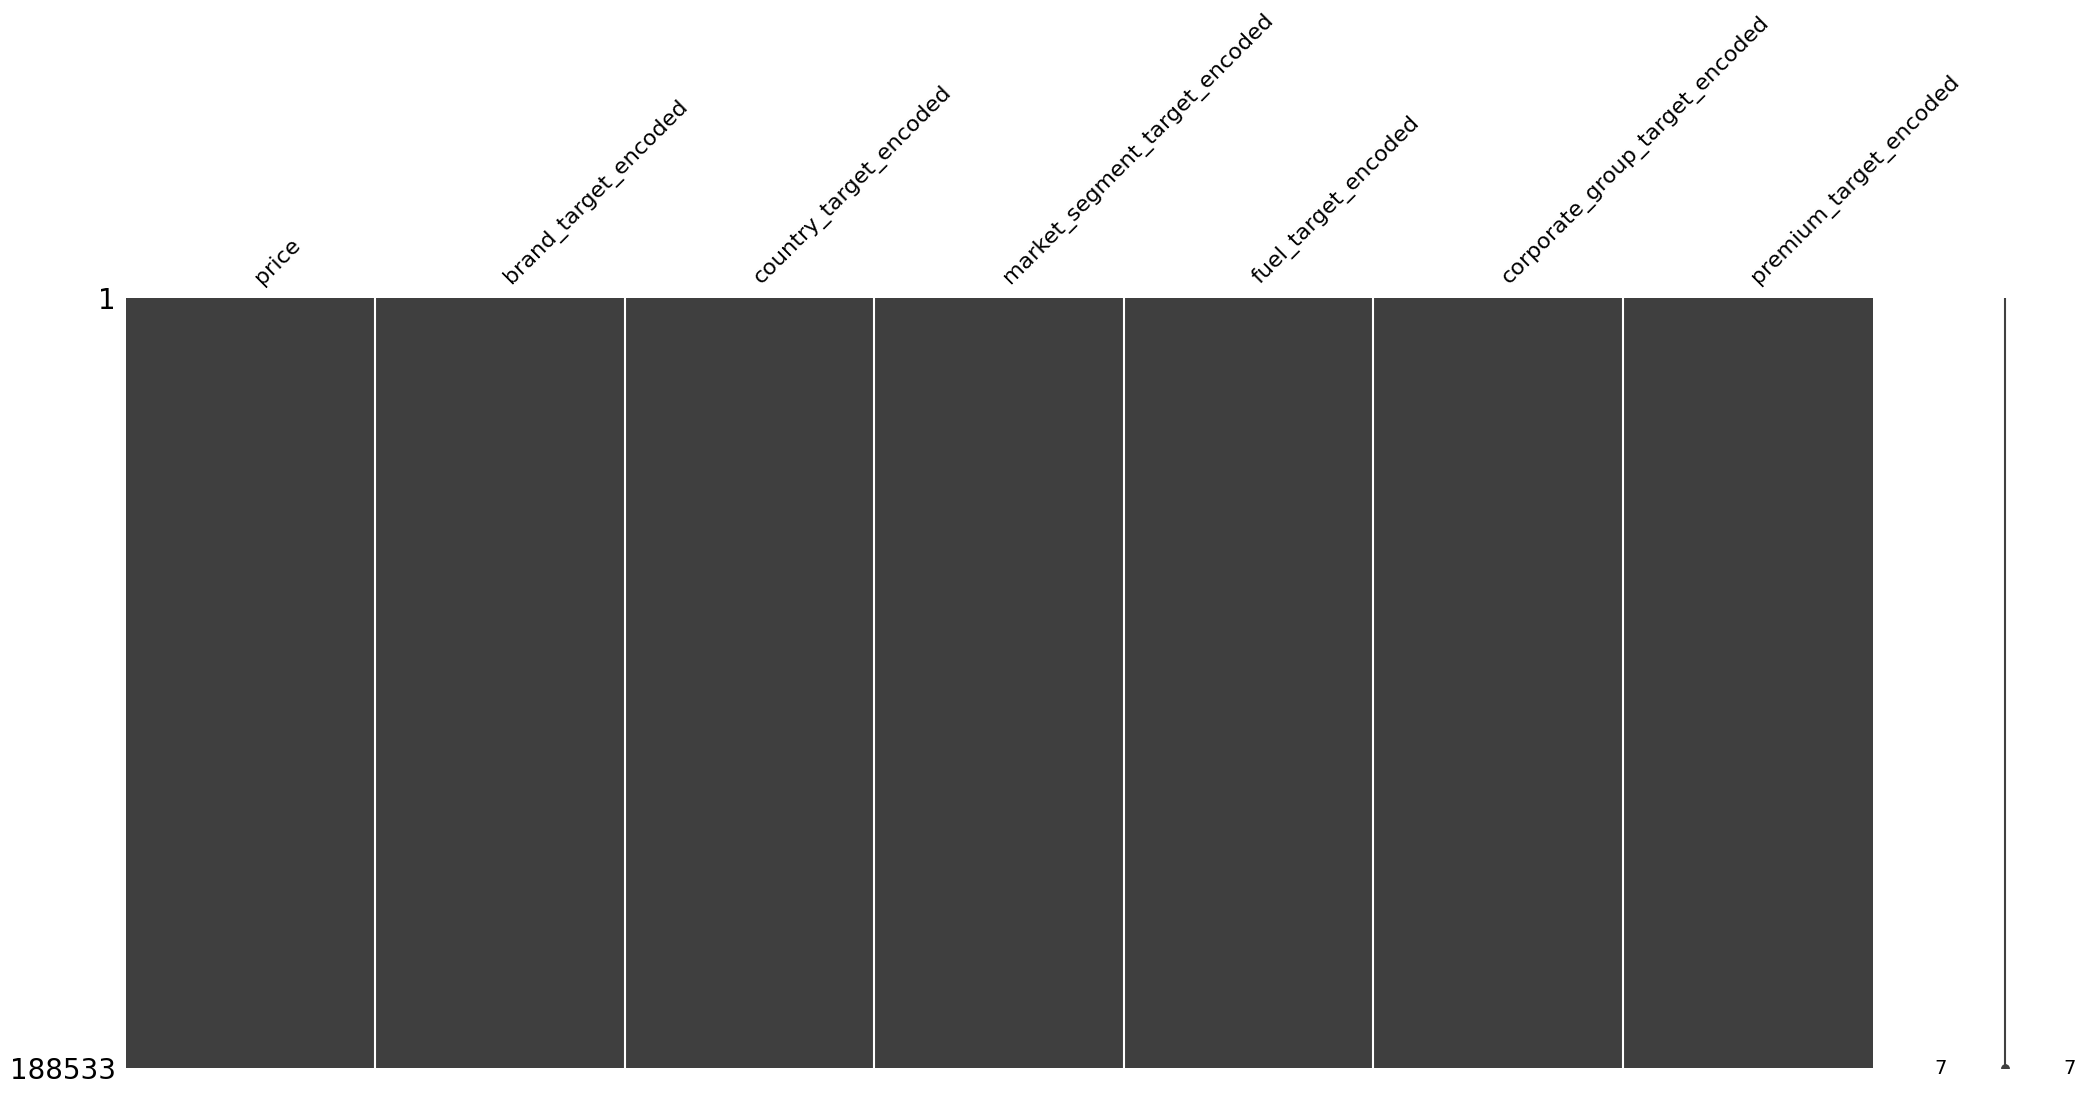

In [20]:
# missing data
msno.matrix(encoded_data)
plt.show()

In [21]:
import numpy as np
import pandas as pd

# Tworzenie kopii danych, aby uniknąć modyfikacji oryginalnych danych
encoded_data_log = foo.copy()

# Usunięcie obserwacji z ceną ≤ 0, ponieważ logarytm z takich wartości jest niezdefiniowany
encoded_data_log = encoded_data_log[encoded_data_log['price'] > 0]

# Obliczenie logarytmu ceny
encoded_data_log['price_log'] = np.log(encoded_data_log['price'])

# Lista zmiennych kategorycznych do zakodowania
categorical_cols = ['brand', 'country', 'market_segment', 'fuel', 'corporate_group', 'premium']

# Obliczenie globalnej mediany ceny 'price_log'
global_median_log = encoded_data_log['price_log'].median()

# Parametr wygładzania
k = 5

# Zakodowanie każdej zmiennej kategorycznej z wygładzaniem, używając 'price_log' jako zmiennej docelowej
for col in categorical_cols:
    # Grupa danych według kategorii
    category_data = encoded_data_log.groupby(col)['price_log']
    
    # Obliczenie mediany i liczby obserwacji dla każdej kategorii
    median = category_data.median()
    count = category_data.count()
    
    # Obliczenie wygładzonej wartości
    smoothing = 1 / (1 + np.exp(-(count - k)))
    encoded_value = global_median_log * (1 - smoothing) + median * smoothing
    
    # Przypisanie wygładzonych wartości do nowych kolumn
    encoded_data_log[f'{col}_target_encoded'] = encoded_data_log[col].map(encoded_value)
    
# Zachowanie tylko kolumn przekodowanych oraz 'price_log'
columns_to_keep = ['price_log'] + [f'{col}_target_encoded' for col in categorical_cols]
encoded_data_log = encoded_data_log[columns_to_keep]

# Sprawdzenie wyników
encoded_data_log.head()


,price_log,brand_target_encoded,country_target_encoded,market_segment_target_encoded,fuel_target_encoded,corporate_group_target_encoded,premium_target_encoded
0,8.342840,9.472128,10.733240,10.271597,10.341742,10.325482,10.257484
1,8.516993,10.064756,10.373491,10.373491,10.341742,10.341742,10.434116
2,9.539644,10.373491,10.373491,10.126551,10.341742,10.365648,10.257484
3,10.714418,10.596610,10.232791,10.373491,10.339126,10.370361,10.434116
4,11.487608,10.506984,10.434116,10.373491,10.341742,10.370361,10.434116


In [22]:
encoded_data_log.shape

(188533, 7)

In [23]:
encoded_data_log.shape

(188533, 7)

In [24]:
from pycaret.regression import *
folds = 10

# [1] Eksperyment dla zmiennej 'price'
exp1 = setup(data=encoded_data
             , target='price'
             , session_id = 123
             , train_size = 0.70
             , fold = folds
            # , silent=True
            )

best_model_price = compare_models(sort='RMSE')

# Wyświetlenie wyników najlepszego modelu
print("Najlepszy model dla zmiennej 'price' (optymalizowany pod RMSE):", best_model_price)

# [2] Eksperyment dla zmiennej 'price_log'
exp2 = setup(data=encoded_data_log
             , target='price_log'
             , session_id=456
             , train_size = 0.70
             , fold = folds
             #, silent=True
            )
best_model_price_log = compare_models(sort='RMSE')

# Wyświetlenie wyników najlepszego modelu
print("Najlepszy model dla zmiennej 'price_log' (optymalizowany pod RMSE):", best_model_price_log)


,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(188533, 7)"
4,Transformed data shape,"(188533, 7)"
5,Transformed train set shape,"(131973, 7)"
6,Transformed test set shape,"(56560, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,27416.6053,6036534318.8720,77490.4583,0.0447,0.8639,1.1652,2.9540
lightgbm,Light Gradient Boosting Machine,27424.5585,6036645768.3742,77491.1101,0.0447,0.8640,1.1655,2.9670
rf,Random Forest Regressor,27433.3930,6036826400.4973,77492.3552,0.0447,0.8643,1.1663,4.6720
catboost,CatBoost Regressor,27425.4362,6036836970.0832,77492.3721,0.0447,0.8640,1.1655,12.6330
xgboost,Extreme Gradient Boosting,27425.4991,6036856277.8871,77492.4961,0.0447,0.8640,1.1655,0.6240
et,Extra Trees Regressor,27425.4996,6036856285.3236,77492.4962,0.0447,0.8640,1.1655,3.2840
dt,Decision Tree Regressor,27425.4996,6036856285.3236,77492.4962,0.0447,0.8640,1.1655,0.1150
ada,AdaBoost Regressor,27539.5121,6044099669.4034,77540.2509,0.0435,0.8685,1.1758,0.3710
br,Bayesian Ridge,27461.8147,6050439587.7685,77582.5062,0.0424,0.8638,1.1574,0.0830
en,Elastic Net,27463.2680,6050442936.8288,77582.5233,0.0424,0.8638,1.1573,0.7260


Najlepszy model dla zmiennej 'price' (optymalizowany pod RMSE): GradientBoostingRegressor(random_state=123)


,Description,Value
0,Session id,456
1,Target,price_log
2,Target type,Regression
3,Original data shape,"(188533, 7)"
4,Transformed data shape,"(188533, 7)"
5,Transformed train set shape,"(131973, 7)"
6,Transformed test set shape,"(56560, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.6116,0.6207,0.7878,0.1285,0.0702,0.0604,2.9550
lightgbm,Light Gradient Boosting Machine,0.6117,0.6207,0.7878,0.1284,0.0702,0.0604,1.0700
et,Extra Trees Regressor,0.6117,0.6208,0.7879,0.1283,0.0702,0.0604,3.8990
rf,Random Forest Regressor,0.6117,0.6208,0.7879,0.1283,0.0702,0.0604,4.4800
catboost,CatBoost Regressor,0.6117,0.6208,0.7879,0.1283,0.0702,0.0604,11.9300
xgboost,Extreme Gradient Boosting,0.6117,0.6208,0.7879,0.1283,0.0702,0.0604,0.3410
dt,Decision Tree Regressor,0.6117,0.6208,0.7879,0.1283,0.0702,0.0604,0.1260
br,Bayesian Ridge,0.6107,0.6219,0.7886,0.1266,0.0703,0.0603,0.0840
lar,Least Angle Regression,0.6107,0.6219,0.7886,0.1266,0.0703,0.0603,0.1040
lr,Linear Regression,0.6107,0.6219,0.7886,0.1266,0.0703,0.0603,0.1090


Najlepszy model dla zmiennej 'price_log' (optymalizowany pod RMSE): GradientBoostingRegressor(random_state=456)


In [37]:
num_unique_models = d['model'].nunique()
print(f"Liczba unikalnych modeli: {num_unique_models}")

Liczba unikalnych modeli: 1897


In [38]:
d['model'] = d['model'].str.strip().str.lower()

In [42]:
num_unique_models = d['model'].nunique()
print(f"Liczba unikalnych modeli: {num_unique_models}")

Liczba unikalnych modeli: 1893


In [ ]:
e

In [46]:
foo = d[['price', 'model']].copy()
foo['price_log'] = np.log(foo['price'])
foo.drop('price', axis=1, inplace=True)

In [49]:
foo = foo[['price_log','model']]

In [50]:
# Wyrażenie regularne do ekstrakcji pojemności silnika
foo['engine_size'] = foo['model'].str.extract(r'(\d\.\d[l|t]?)', expand=False)

In [51]:
# Lista potencjalnych wersji wyposażenia
trims = ['base', 'sport', 'premium', 'limited', 'platinum', 'ultimate']

# Ekstrakcja wersji wyposażenia
pattern = '|'.join(trims)
foo['trim'] = foo['model'].str.extract(f'({pattern})', expand=False)

In [52]:
# Funkcja do grupowania rzadkich kategorii
def reduce_categories(col, min_count=50):
    counts = foo[col].value_counts()
    rare = counts[counts < min_count].index
    foo[col] = foo[col].replace(rare, 'other')

reduce_categories('engine_size')
reduce_categories('trim')

In [54]:
import numpy as np

categorical_cols = ['engine_size', 'trim']

for col in categorical_cols:
    # Obliczenie globalnej mediany
    global_median = foo['price_log'].median()

    # Grupa danych według kategorii
    category_data = foo.groupby(col)['price_log']
    median = category_data.median()
    count = category_data.count()

    # Parametr wygładzania
    k = 5

    # Obliczenie wygładzonej wartości
    smoothing = 1 / (1 + np.exp(-(count - k)))
    encoded_value = global_median * (1 - smoothing) + median * smoothing

    # Przypisanie zakodowanych wartości
    foo[f'{col}_target_encoded'] = foo[col].map(encoded_value)

In [55]:
foo = pd.get_dummies(foo, columns=categorical_cols)

In [56]:
foo

,price_log,model,engine_size_target_encoded,trim_target_encoded,engine_size_1.4t,engine_size_1.8,engine_size_1.8t,engine_size_2.0,engine_size_2.0l,engine_size_2.0t,...,engine_size_5.0,engine_size_5.0l,engine_size_5.2,engine_size_other,trim_base,trim_limited,trim_platinum,trim_premium,trim_sport,trim_ultimate
0,8.342840,cooper s base,NaN,10.203592,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,8.516993,ls v8,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.539644,silverado 2500 lt,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.714418,g90 5.0 ultimate,10.612877,10.785083,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,11.487608,metris base,NaN,10.203592,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,10.221941,escalade esv platinum,NaN,10.621327,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
188529,10.308953,amg c 43 amg c 43 4matic,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188530,11.372513,amg glc 63 base 4matic,NaN,10.203592,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
188531,11.349229,s5 3.0t prestige,10.308919,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)  # Możesz dostosować liczbę cech
model_tfidf = tfidf.fit_transform(d['model'])

# Konwersja do DataFrame
tfidf_df = pd.DataFrame(model_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Połączenie z oryginalnym DataFrame
foo = pd.concat([foo.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)


In [58]:
foo

,price_log,model,engine_size_target_encoded,trim_target_encoded,engine_size_1.4t,engine_size_1.8,engine_size_1.8t,engine_size_2.0,engine_size_2.0l,engine_size_2.0t,...,supercharged,tahoe,touring,transit,tundra,turbo,v6,wrangler,xdrive,xlt
0,8.342840,cooper s base,NaN,10.203592,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.516993,ls v8,NaN,NaN,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.539644,silverado 2500 lt,NaN,NaN,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.714418,g90 5.0 ultimate,10.612877,10.785083,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.487608,metris base,NaN,10.203592,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,10.221941,escalade esv platinum,NaN,10.621327,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188529,10.308953,amg c 43 amg c 43 4matic,NaN,NaN,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188530,11.372513,amg glc 63 base 4matic,NaN,10.203592,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188531,11.349229,s5 3.0t prestige,10.308919,NaN,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
foo.drop(columns=['model'], inplace=True)

In [ ]:
# [3] Eksperyment dla zmiennej 'price_log'
exp3 = setup(data=foo
             , target='price_log'
             , session_id=456
             , train_size = 0.70
             , fold = folds
             #, silent=True
            )
best_model_price_log = compare_models(sort='RMSE')

# Wyświetlenie wyników najlepszego modelu
print("Najlepszy model dla zmiennej 'price_log' (optymalizowany pod RMSE):", best_model_price_log)


,Description,Value
0,Session id,456
1,Target,price_log
2,Target type,Regression
3,Original data shape,"(188533, 138)"
4,Transformed data shape,"(188533, 138)"
5,Transformed train set shape,"(131973, 138)"
6,Transformed test set shape,"(56560, 138)"
7,Numeric features,101
8,Rows with missing values,95.8%
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:51:21
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.5428,0.5312,0.7288,0.2540,0.0648,0.0535,3.1270
rf,Random Forest Regressor,0.5428,0.5312,0.7288,0.2540,0.0648,0.0535,195.4980
ridge,Ridge Regression,0.5668,0.5642,0.7511,0.2077,0.0669,0.0559,1.0640
br,Bayesian Ridge,0.5668,0.5642,0.7511,0.2077,0.0669,0.0559,2.1480
lr,Linear Regression,0.5672,0.5646,0.7514,0.2071,0.0669,0.0559,2.5500
huber,Huber Regressor,0.5673,0.5682,0.7538,0.2020,0.0671,0.0560,12.1040
omp,Orthogonal Matching Pursuit,0.6107,0.6329,0.7956,0.1112,0.0708,0.0602,1.2640
lasso,Lasso Regression,0.6567,0.7122,0.8439,-0.0000,0.0751,0.0648,2.1750
en,Elastic Net,0.6567,0.7122,0.8439,-0.0000,0.0751,0.0648,1.6320
llar,Lasso Least Angle Regression,0.6567,0.7122,0.8439,-0.0000,0.0751,0.0648,0.9520


Processing:   0%|          | 0/85 [00:00<?, ?it/s]